In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [24]:
flights = pd.read_csv('flights_train.csv', delimiter=',')

In [25]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        132 non-null    object
 1   passengers  132 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [26]:
flights['date'] = flights['date'].astype(str)
flights['date'] = pd.to_datetime(flights['date'])

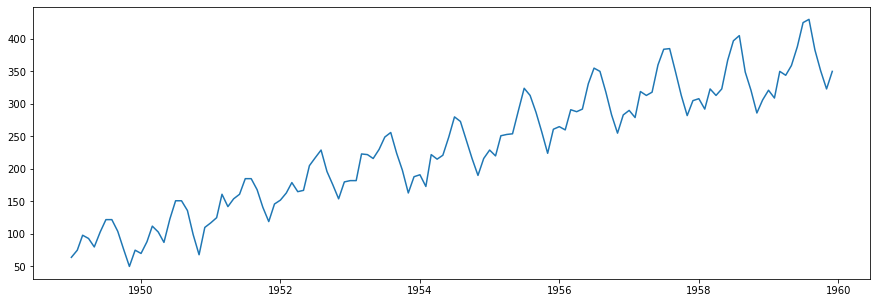

In [27]:
plt.figure(figsize=(15,5))
plt.plot(flights['date'],flights['passengers'])

In [28]:
flights['timestep'] = list(range(len(flights)))

In [29]:
flights

,date,passengers,timestep
0,1949-01-01,64,0
1,1949-02-01,75,1
2,1949-03-01,98,2
3,1949-04-01,93,3
4,1949-05-01,80,4
...,...,...,...
127,1959-08-01,430,127
128,1959-09-01,383,128
129,1959-10-01,351,129
130,1959-11-01,323,130


In [30]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        132 non-null    datetime64[ns]
 1   passengers  132 non-null    int64         
 2   timestep    132 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.2 KB


In [31]:
#flights = flights.set_index('date')

In [32]:
y = flights['passengers']
X = flights[['timestep']]

In [33]:
m = LinearRegression()

In [34]:
m.fit(X,y)

LinearRegression()

In [35]:
print("Coefficients: \n", m.coef_)

Coefficients: 
 [2.31764439]


In [36]:
y_pred = m.predict(X)

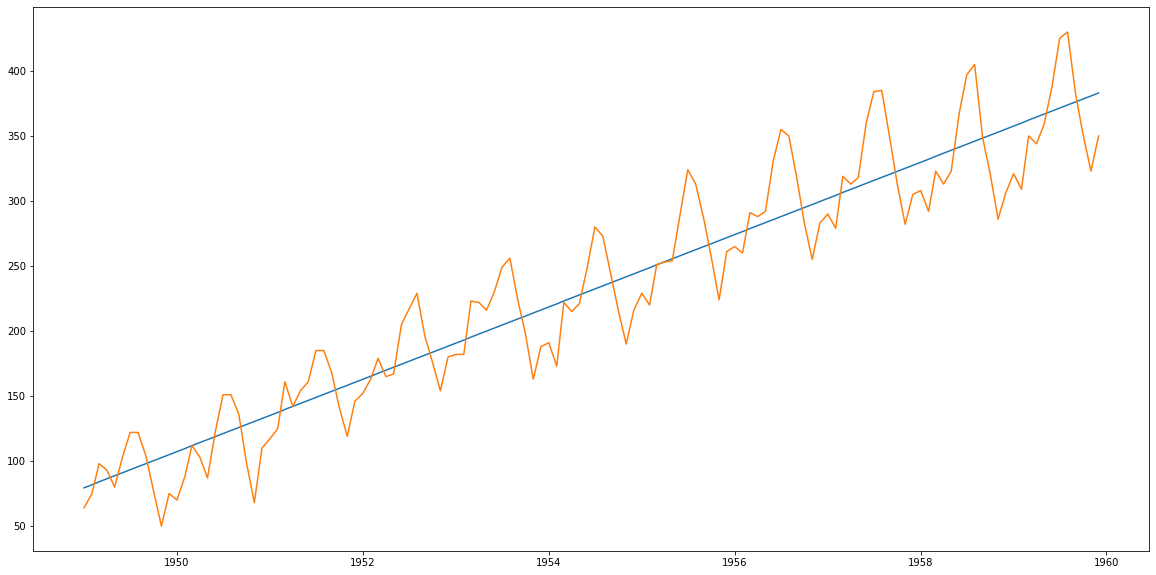

In [37]:
plt.figure(figsize=(20,10))
plt.plot(flights['date'],y_pred)
plt.plot(flights['date'],y)
#plt.show()

In [38]:
flights_2 = flights.set_index('date')

In [39]:
seasonal_dummies = pd.get_dummies(flights_2.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(flights_2.index)

flights_2 = flights_2.join(seasonal_dummies)

In [40]:
flights_2.head(30)

,passengers,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,
1949-01-01,64,0,0,0,0,0,0,0,0,0,0,0,0
1949-02-01,75,1,1,0,0,0,0,0,0,0,0,0,0
1949-03-01,98,2,0,1,0,0,0,0,0,0,0,0,0
1949-04-01,93,3,0,0,1,0,0,0,0,0,0,0,0
1949-05-01,80,4,0,0,0,1,0,0,0,0,0,0,0
1949-06-01,103,5,0,0,0,0,1,0,0,0,0,0,0
1949-07-01,122,6,0,0,0,0,0,1,0,0,0,0,0
1949-08-01,122,7,0,0,0,0,0,0,1,0,0,0,0
1949-09-01,104,8,0,0,0,0,0,0,0,1,0,0,0


In [41]:
X2 = flights_2.drop(flights[['passengers']],axis=1)
y2 = flights_2['passengers']

In [42]:
m.fit(X2,y2)

LinearRegression()

In [43]:
y_pred_2 = m.predict(X2)

In [44]:
max(y_pred_2)

421.132575757576

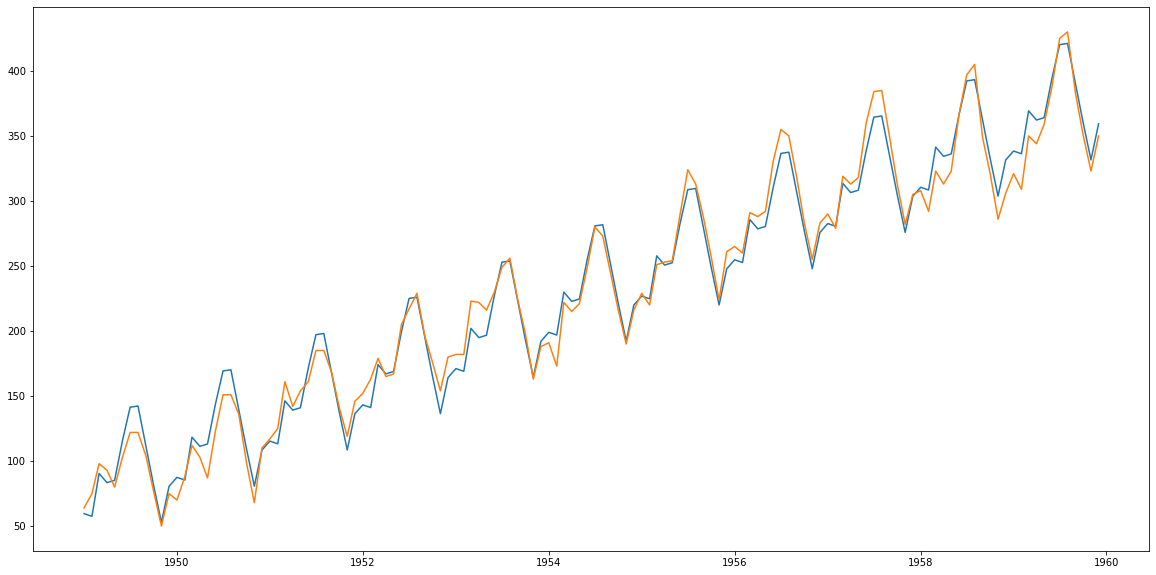

In [45]:
plt.figure(figsize=(20,10))
plt.plot(flights['date'],y_pred_2)
plt.plot(flights['date'],y2)
plt.show()

In [46]:
#remainder = y - y_pred_2
#y = np.array(y)

In [47]:
remainder = y - y_pred_2

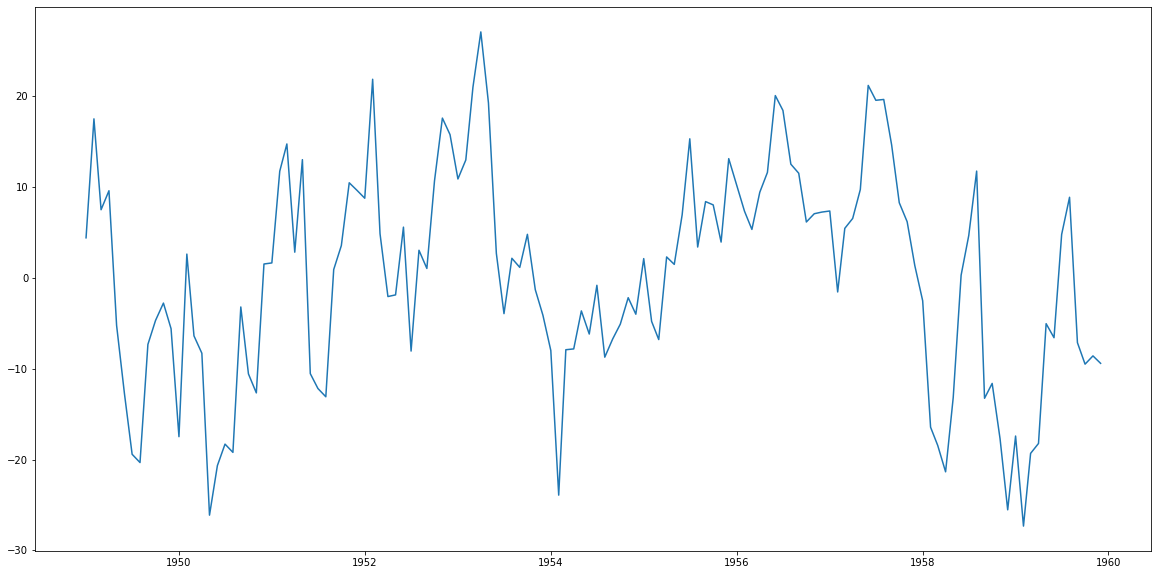

In [48]:
plt.figure(figsize=(20,10))
plt.plot(flights['date'],remainder)

In [49]:
remainder.to_csv('remainder.csv')